In [1]:
import math as math
import numpy as np, matplotlib.pyplot as plt
import astropy.units as u, astropy.constants as c

In [73]:
# integral computed from eq. (43) in Kahniashvili et al.
# PRD 78, 2008

expp = 2; exp0 = -1; expd = 6;

kp = 10**(expp); kd = 10**(expd); k1 = 10**(exp0)

CK = 1
M = .1
eps = kp*M**3

k1 = np.logspace(expp, expd, 50)
om1 = np.logspace(exp0, expp + 3, 50)
om_ones = np.zeros(len(om1)) + 1.
k_ones = np.zeros(len(k1)) + 1.

erf = np.zeros((len(om1), len(k1)))
for i in range(0, len(om1)):
    for j in range(0, len(k1)):
        erf[i, j] = math.erf(-om1[i]*(eps*k1[j]**2)**(-1/3))

k = np.outer(om_ones, k1)
om = np.outer(om1, k_ones)

f1 = np.exp(-om**2*(eps*k**2)**(-2/3))
f2 = 1 - erf
f = 7/6*CK**2*eps*np.pi**(-3/2)*f1*f2/k**6

Hijij = np.trapz(f, k1)

(100.0, 1000.0)

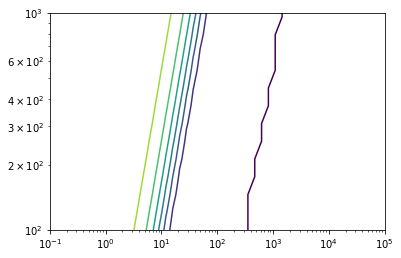

In [74]:
plt.contour(om, k, f1)
plt.xscale('log')
plt.yscale('log')
plt.ylim([1e2, 1e3])

(1e-16, 1e-12)

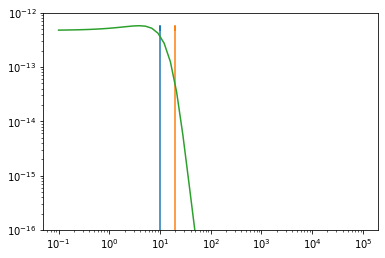

In [82]:
om_fix = np.zeros(len(om1)) + .1*kp
om_fix2 = np.zeros(len(om1)) + .2*kp
plt.plot(om_fix, Hijij)
plt.plot(om_fix2, Hijij)

plt.plot(om1, Hijij)
plt.xscale('log')
plt.yscale('log')
plt.ylim([1e-16, 1e-12])

In [72]:
k0 = 1e2
kd = 1e7
k1 = 1

CK = 1
M = .1
eps = k0*M**3

k = np.logspace(np.log10(k0), np.log10(kd), 200)
om = np.logspace(np.log10(k1), np.log10(kd), 200)

f1 = np.zeros((len(k), len(om)))
f2 = np.zeros((len(k), len(om)))

for i in range(0, len(k)):
    for j in range(0, len(om)):
        f1[i, j] = np.exp(-om[j]**2/eps**(2/3)/k[i]**(4/3))
        f2[i, j] = 1 - math.erf(-om[j]/eps**(1/3)/k[j]**(2/3))

In [21]:
integra = np.zeros(len(om))        

for j in range(0, len(om)):
    int_aux = f1[:, j]*f2[:, j]/k**6
    integra[j] = np.trapz(int_aux, k)

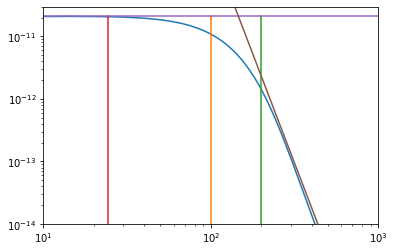

In [59]:
plt.plot(om, integra)
plt.plot(om_fix, integra)
plt.plot(om_fix2, integra)
plt.plot(om_fix3, integra)
plt.plot(om, int_fix)
plt.plot(om, slope1)
plt.xscale('log')
plt.yscale('log')
_ = plt.ylim([1e-14, 3e-11])
_ = plt.xlim([10, 1e3])

In [52]:
om_fix = np.zeros(len(om)) + k0
om_fix2 = np.zeros(len(om)) + 2*k0
int_fix = np.zeros(len(om)) + max(integra)
slope1 = 3e4*om**(-7)

In [69]:
k_p = np.trapz(integra, om)/np.trapz(integra*om**(-1), om)
k_p2 = np.trapz(integra, np.log(om))/np.trapz(integra*om**(-1), np.log(om))
om_fix3 = np.zeros(len(om)) + k_p

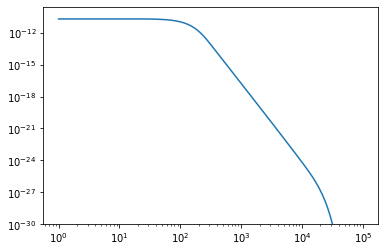

In [62]:
plt.plot(om, integra)
plt.xscale('log')
plt.yscale('log')
_= plt.ylim([1e-30, 3e-10])